In [5]:
pip install opencv-python==4.5.5.64

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66




[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Making prediction

In [356]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd

In [357]:
#loading saved model

In [358]:
model = tf.keras.models.load_model('./models/object_detection2.h5')

C:\Users\Marouane\anaconda3\lib\site-packages\keras\layers\core\lambda_layer.py:303: UserWarning: tensorflow.python.keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


In [359]:
images_path = '../1-data_labeling/images/'

In [360]:
#original image and its shape

(907, 1070, 3)


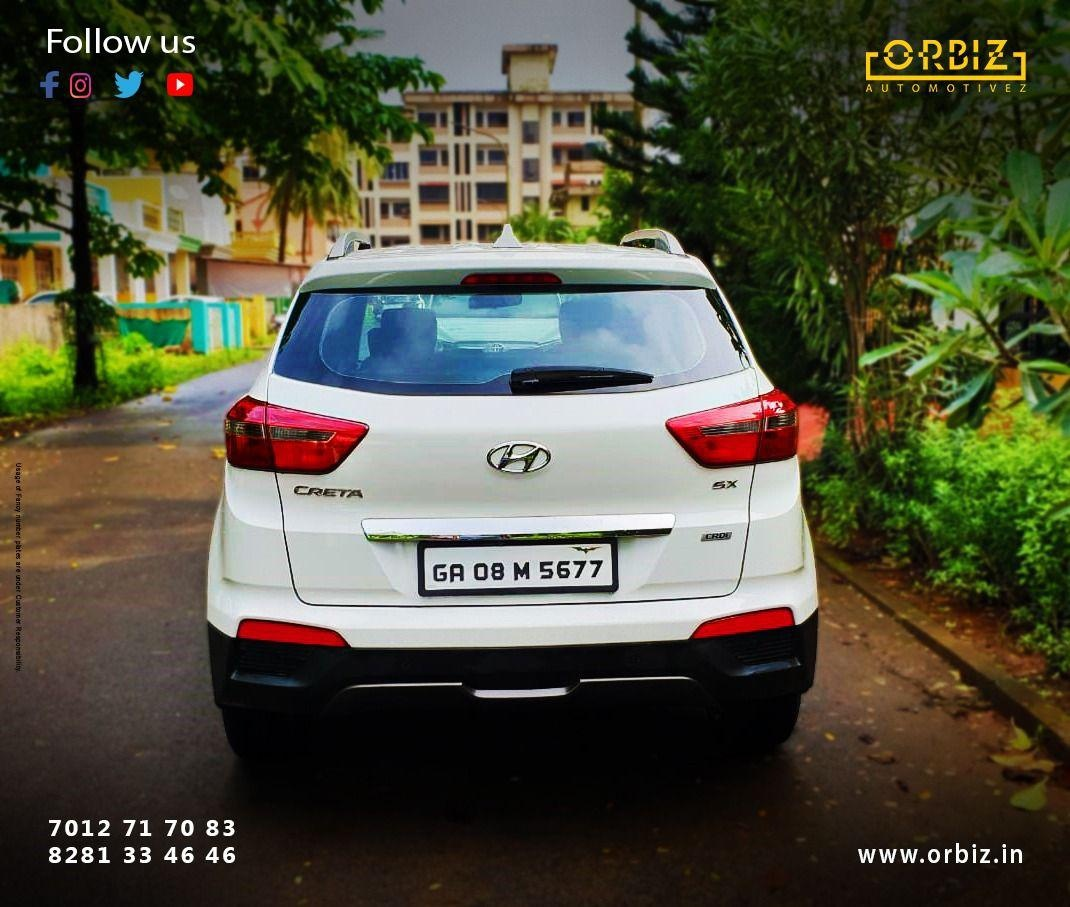

In [361]:
original_image = load_img(images_path+'N147.jpeg')
original_image_arr = img_to_array(original_image)
print(original_image_arr.shape)
original_image

In [362]:
#normalization of the image
#1- changing size to 224x224
#2- normalizing pixels by dividing by 255

In [363]:
def normalied_image(image_path):
    image = load_img(image_path, target_size=(224,224))
    image_arr = img_to_array(image)
    #image_to_predict_arr.shape
    image_arr_norm = image_arr/255.0
    #print(image_arr_norm.shape)
    return image_arr_norm

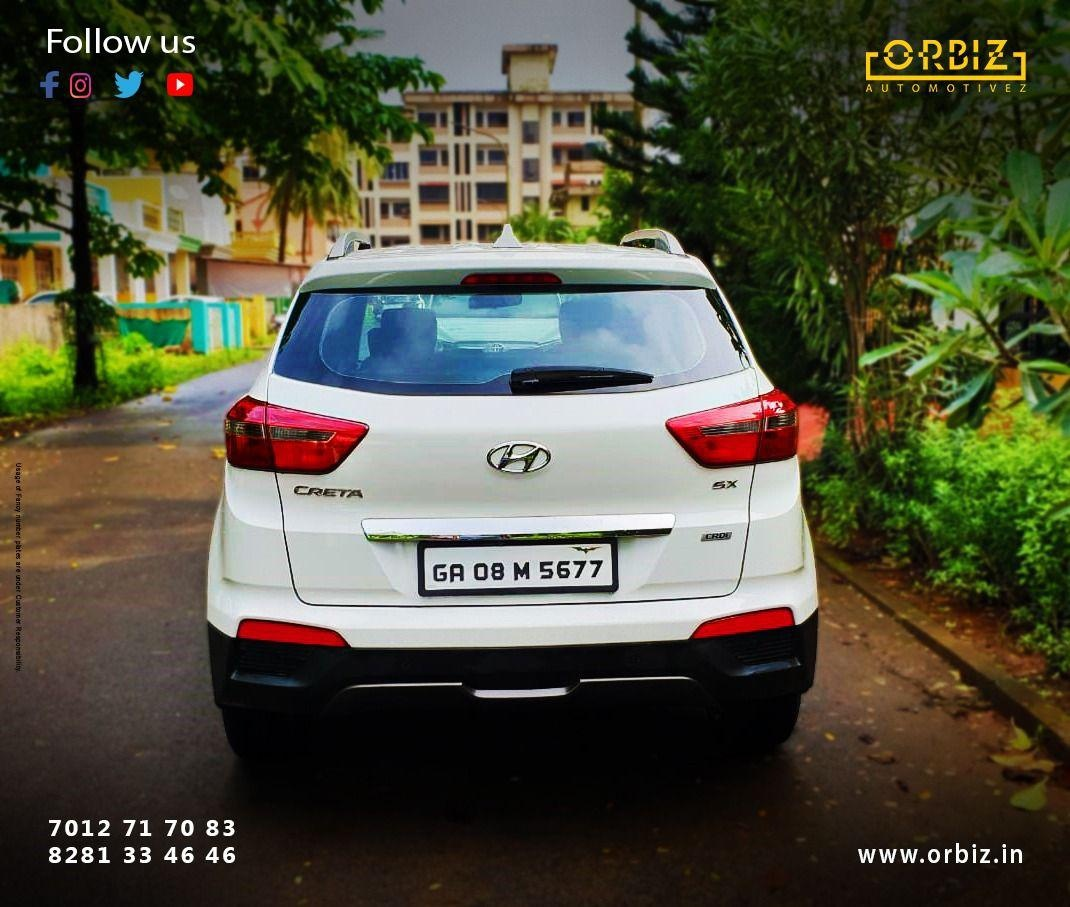

In [364]:
original_image = load_img(images_path+'N147.jpeg')
original_image

In [365]:
image_to_predict = normalied_image(images_path+'N147.jpeg')
image_to_predict.shape

(224, 224, 3)

In [366]:
#reshaping from (224, 224, 3) to (1, 224, 224, 3) 1 stand for the whole image that contains 
#224 x 224 pixels and 3 dimensions because our model is trained like that

In [367]:
image_to_predict_reshaped = image_to_predict.reshape((1,224, 224, 3))
image_to_predict_reshaped.shape

(1, 224, 224, 3)

In [368]:
#predicting the x and y (min and max), we trained our model with normalized x, y (min and max) so
#the prediction will be so

In [369]:
pred = model.predict(image_to_predict_reshaped)
pred = pred[0]
pred

1/1 [==============================] - 3s 3s/step


array([0.4124008 , 0.5691067 , 0.6008459 , 0.64807326], dtype=float32)

In [370]:
#after that we need to denormalize (convert to original value) by multiplying the output by the
#weight and height of the original image

In [371]:
h,w,d = original_image_arr.shape
h,w,d

(907, 1070, 3)

In [372]:
xmin, xmax, ymin, ymax = pred[0]*w, pred[1]*w, pred[2]*h, pred[3]*h
xmin, xmax, ymin, ymax

(441.2688687443733, 608.9441668987274, 544.96720713377, 587.8024432063103)

In [373]:
pred_denorm = np.array((xmin, xmax, ymin, ymax))
pred_denorm

array([441.26886874, 608.9441669 , 544.96720713, 587.80244321])

In [374]:
pred_denorm = np.array((xmin, xmax, ymin, ymax)).astype(np.int32)
pred_denorm

array([441, 608, 544, 587])

In [375]:
pred_denorm.shape

(4,)

In [376]:
df = pd.read_csv('C:/Users/Marouane/Desktop/Master_DSBD/S3/PREDICTIVE ANALYSIS/courses/Automatic Number Plate Recognition/practise/1-data_labeling/CarsImagesLabeled.csv')
df

,filepath,xmin,xmax,ymin,ymax
0,./images\N1.xml,1095,1397,648,735
1,./images\N100.xml,132,302,305,351
2,./images\N101.xml,20,139,128,162
3,./images\N102.xml,162,317,208,250
4,./images\N103.xml,811,1069,671,728
...,...,...,...,...,...
222,./images\N95.xml,19,413,172,395
223,./images\N96.xml,119,369,134,196
224,./images\N97.xml,175,291,228,254
225,./images\N98.xml,565,673,209,236


In [377]:
for i in range(len(df['filepath'])):
    if df['filepath'][i].endswith('N147.xml'):
        (xmin,xmax,ymin,ymax) = df['xmin'][i],df['xmax'][i],df['ymin'][i],df['ymax'][i]

In [378]:
(xmin,xmax,ymin,ymax), pred_denorm

((423, 614, 542, 590), array([441, 608, 544, 587]))

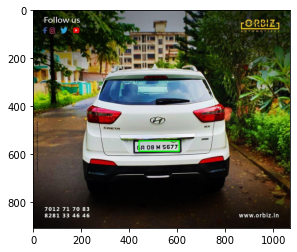

In [379]:
img = cv2.imread('../1-data_labeling/images/N147.jpeg')
gg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixels = np.array(gg)
cv2.rectangle(pixels,(pred_denorm[0], pred_denorm[2]), (pred_denorm[1], pred_denorm[3]), (0,255,0), 3)
plt.imshow(pixels)

In [398]:
#pipeline:
def object_detection(path):
    imag = load_img(path)
    image = img_to_array(imag)
    image1 = load_img(path, target_size=(224,224))
    image_arr = img_to_array(image1)
    image_arr_norm = image_arr/255.0
    h,w,d = image.shape
    test_arr = image_arr_norm.reshape(1,224,224,3)
    pred = model.predict(test_arr)
    pred = pred[0]
    xmin, xmax, ymin, ymax = pred[0]*w, pred[1]*w, pred[2]*h, pred[3]*h
    pred_denorm = np.array((xmin, xmax, ymin, ymax)).astype(np.int32)
    xmin, xmax, ymin, ymax = pred_denorm
    pixels = np.array(imag)
    cv2.rectangle(pixels, (pred_denorm[0], pred_denorm[2]), (pred_denorm[1], pred_denorm[3]), (0,255,0), 3)
    #plt.imshow(pixels)
    return pixels, pred_denorm

1/1 [==============================] - 0s 178ms/step


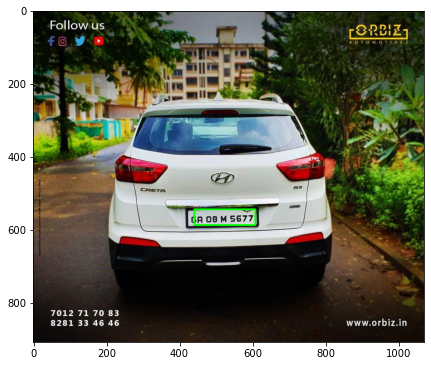

In [399]:
img ,predictions = object_detection('../1-data_labeling/images/N147.jpeg')
plt.figure(figsize=(7,15))
plt.imshow(img)

1/1 [==============================] - 0s 183ms/step


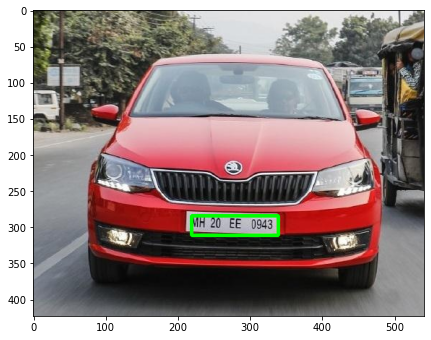

In [401]:
img207 ,predictions207 = object_detection('../1-data_labeling/images/N207.jpeg')
plt.figure(figsize=(7,15))
plt.imshow(img207)
plt.show()

In [406]:
img207.shape, predictions207.shape

((423, 541, 3), (4,))

# Optical Character Recognition - OCR

In [400]:
import pytesseract as pt

In [411]:
def extract_plac(path):
    img207, prediction = object_detection(path)
    xmin, xmax, ymin, ymax = prediction
    plac = img207[ymin:ymax, xmin:xmax]
    text = pt.image_to_string(plac)
    return plac, text

In [412]:
plaque, text_plaque = extract_plac('../1-data_labeling/images/N207.jpeg')

1/1 [==============================] - 0s 188ms/step


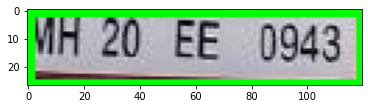

In [413]:
plt.imshow(plaque)

In [414]:
text_plaque

'MH 20 EE 0943\n\x0c'